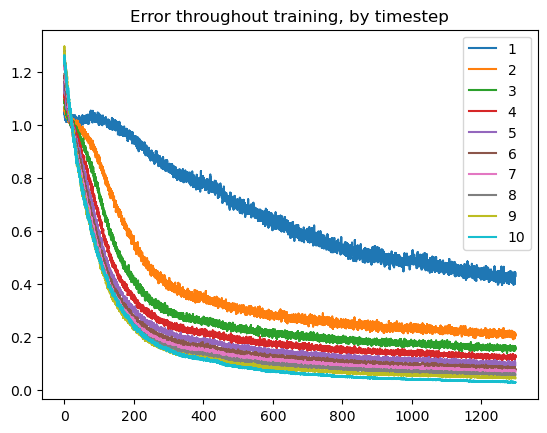

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# with open("mnist_generator_error_baseline.pkl", "rb") as f:
#     error = pickle.load(f)
with open("mnist_generator_error.pkl", "rb") as f:
    error = pickle.load(f)

plots = {}

for trainstep in range(len(error)):
    # each of these represents a batch from training.
    # `err` and `diffusionstep` are a pair of same-sized
    # tensors.
    err, diffusionstep = error[trainstep]
    diffusionstep = diffusionstep.view(-1)
    for (E, DS) in zip(err, diffusionstep):
        DS = int(DS.item())
        if DS not in plots:
            plots[DS] = {'x': [], 'y': []}
        plots[DS]['x'].append(trainstep)
        plots[DS]['y'].append(E.item())


for i in range(0, 10, 10):
    plt.title("Error throughout training, by timestep")
    for sub_i in range(i, i + 10):
        if (sub_i + 1) not in plots:
            # should only happen for plot 100
            continue
        xy = plots[sub_i + 1]
        x = np.array(xy['x'])
        y = np.array(xy['y'])
        moving_avg_k = 32
        y = np.convolve(np.array(y), np.ones(moving_avg_k), mode='valid') / moving_avg_k
        x = x[:len(y)]
        plt.plot(x, y, label=sub_i + 1)
        # print(sub_i, np.mean(y))
    plt.legend()
    plt.show()


In [21]:
import torch

noise_levels = 10
betas = torch.linspace(1e-4, 0.02, noise_levels)
alphabar = torch.cumprod(1 - betas, dim=0)


In [18]:
alphabar

tensor([0.9999, 0.9976, 0.9931, 0.9864, 0.9776, 0.9667, 0.9537, 0.9389, 0.9222,
        0.9037])